<a href="https://colab.research.google.com/github/sdr999/PredictiPay/blob/main/PredictiPayFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wget

In [41]:
import pandas as pd
import requests
import wget
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
csv_url="https://raw.githubusercontent.com/sdr999/PredictiPay/main/Salary_Data_Based_country_and_race.csv"
response= requests.get(csv_url)
with open("Salary_Data_Based_country_and_race.csv","wb") as file:
  file.write(response.content)
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")
file.close()

data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [43]:
data.shape

(6704, 9)

In [44]:
data.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [45]:
data.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [46]:
data.dropna(axis=0, inplace=True)

In [47]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [48]:
data.drop(columns="Unnamed: 0", axis=0, inplace=True)

In [49]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [50]:
data.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [51]:
def categorize_Job(job_title):
  job_title=str(job_title).lower()
  if 'software' in job_title or 'developer' in job_title:
    return 'Software/Developer'
  elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
    return 'Data Analyst/Scientist'
  elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
    return 'Manager/Director/VP'
  elif 'sales' in job_title or 'representative' in job_title:
    return 'Sales'
  elif 'marketing' in job_title or 'social media' in job_title:
    return 'Marketing/Social Media'
  elif 'product' in job_title or 'designer' in job_title:
    return 'Product/Designer'
  elif 'hr' in job_title or 'human resources' in job_title:
    return 'HR/Human Resources'
  elif 'financial' in job_title or 'accountant' in job_title:
    return 'Financial/Accountant'
  elif 'project manager' in job_title:
    return 'Project Manager'
  elif 'it' in job_title or 'support' in job_title:
    return 'IT/Technical Support'
  elif 'operations' in job_title or 'supply chain' in job_title:
    return 'Operations/Supply Chain'
  elif 'customer service' in job_title or 'receptionist' in job_title:
    return 'Customer Service/Receptionist'
  else:
    return 'Other'

data['Job Title']=data['Job Title'].apply(categorize_Job)

In [52]:
def group_education(Educaton):
 Educaton = str(Educaton).lower()
 if 'high school' in Educaton:
  return 'High School'
 elif 'bachelor\'s' in Educaton or 'bachelors' in Educaton:
  return 'Bachelors'
 elif 'master\'s' in Educaton or 'masters' in Educaton:
  return 'Masters'
 elif 'phd' in Educaton:
  return 'PhD'
data['Education Level']=data['Education Level'].apply(group_education)

In [53]:
data['Job Title'].unique()

array(['Software/Developer', 'Data Analyst/Scientist',
       'Manager/Director/VP', 'Sales', 'Marketing/Social Media',
       'Customer Service/Receptionist', 'Other', 'IT/Technical Support',
       'Product/Designer', 'Financial/Accountant', 'HR/Human Resources',
       'Operations/Supply Chain'], dtype=object)

In [54]:
data['Education Level'].unique()

array(['Bachelors', 'Masters', 'PhD', 'High School'], dtype=object)

In [55]:
data2 = data.copy()
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


In [56]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
values=['Gender','Education Level','Job Title','Country','Race']
for value in values:
  data[value]=lb.fit_transform(data[value])
  print(value,data[value].unique())

Gender [1 0 2]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Country [3 4 1 2 0]
Race [9 5 1 6 4 2 8 0 7 3]


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(data[['Age', 'Years of Experience', 'Salary']])
mean_salary = scaler.mean_[2]
std_salary = np.sqrt(scaler.var_[2])


In [58]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


<Axes: >

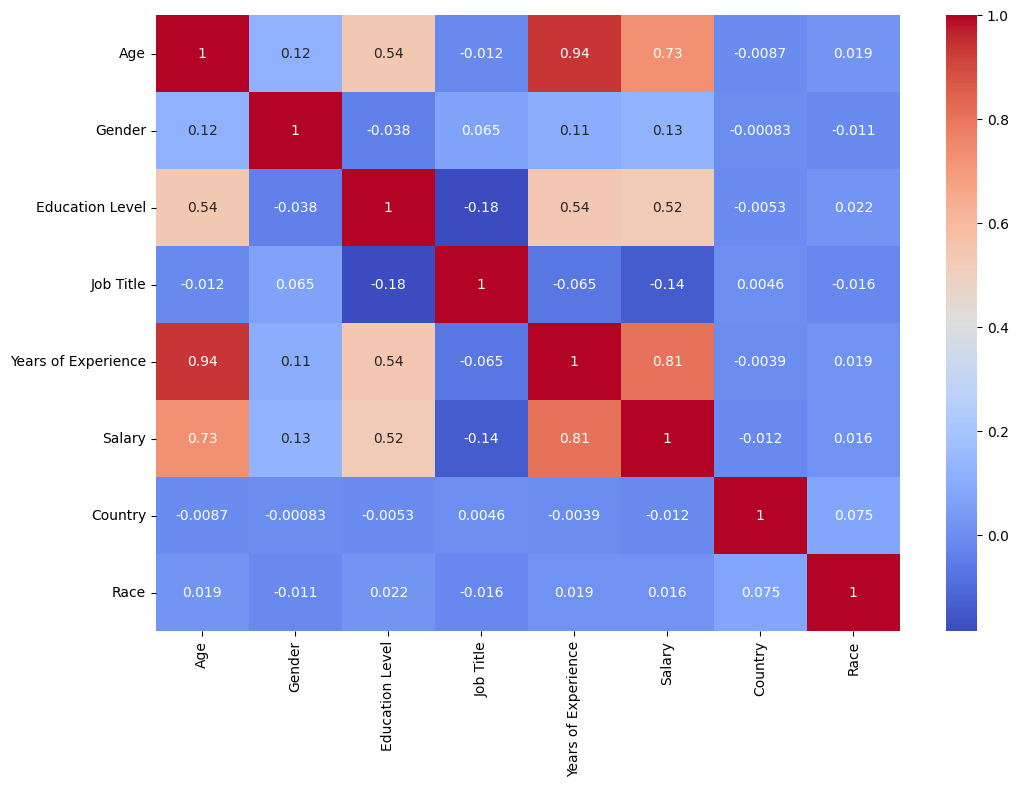

In [59]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Salary', axis=1), data['Salary'], test_size=0.2, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

In [62]:
from sklearn.model_selection import GridSearchCV

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

#print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [63]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [64]:
#fitting the training data
dtree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [65]:
#training accuracy
dtree.score(X_train, y_train)

0.9656459784687974

In [66]:
#predicting the salary of an employee
d_pred = dtree.predict(X_test)

In [67]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.678470
1,-0.745659,-0.688434
2,-0.290405,-0.290405
3,-1.048183,-1.036343
4,-0.669294,-0.610093
5,1.414598,1.494747
6,-0.820850,-0.715794
7,-1.142906,-1.122777
8,1.509320,1.554189
9,0.277930,0.287811


<Axes: xlabel='Actual', ylabel='Density'>

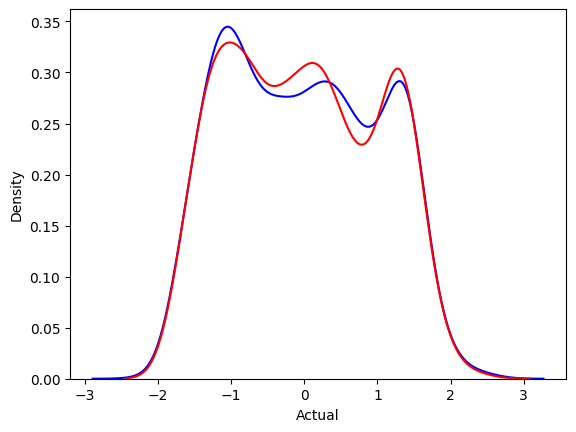

In [68]:
ax = sns.kdeplot(dft['Actual'], color = 'blue', label = 'Actual')
sns.kdeplot(  dft['Predicted'], color = 'red', ax=ax, label = 'Predicted')

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.9323013355107719
Mean Squared Error:  0.06928069008068977
Mean Absolute Error:  0.13812719621413622
RMSE: 0.2632122529075912


In [70]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [71]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
#training accuracy
rfg.score(X_train, y_train)

0.9882168627655085

In [73]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

In [74]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.649396
1,-0.745659,-0.715810
2,-0.290405,-0.310865
3,-1.048183,-1.052920
4,-0.669294,-0.639851
5,1.414598,1.498664
6,-0.820850,-0.815356
7,-1.142906,-1.111742
8,1.509320,1.538493
9,0.277930,0.311836


<Axes: xlabel='Actual', ylabel='Density'>

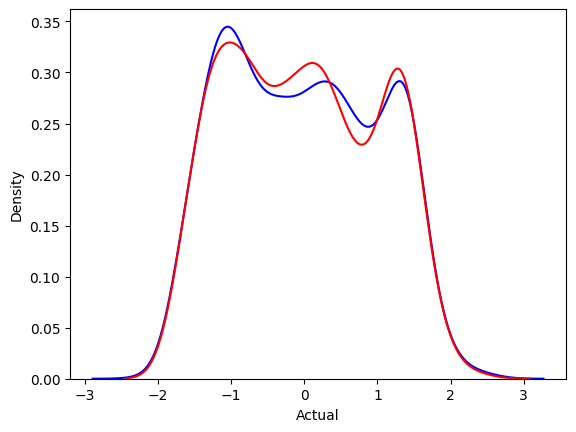

In [75]:
ax = sns.kdeplot(dft['Actual'], color = 'blue', label = 'Actual')
sns.kdeplot(  dft['Predicted'], color = 'red', ax=ax,label = 'Predicted')

In [76]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9472735170032834
Mean Squared Error:  0.053958629097055816
Mean Absolute Error:  0.1142463218930694
RMSE: 0.2322899677064333


In [77]:
def denormalize_salary(scaled_salary, mean_salary, std_salary):
    denormalized_salary = (scaled_salary * std_salary) + mean_salary
    print("Salary=",denormalized_salary)
    return denormalized_salary


In [78]:
def preprocess_input(input_data):

  if "Unnamed: 0" in input_data.columns:
    input_data.drop(columns="Unnamed: 0", axis=1, inplace=True)
  input_data['Education Level']=input_data['Education Level'].apply(group_education)
  input_data['Job Title']=input_data['Job Title'].apply(categorize_Job)
  categorical_columns = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']
    # Perform label encoding
  encoded_data = input_data.copy()
  for column in categorical_columns:
    lb.fit(data2[column].unique())
    encoded_data[column] = lb.transform(encoded_data[column])
  normalized_data = encoded_data.copy()
  normalized_columns = ['Age', 'Years of Experience', 'Salary']
  normalized_data[normalized_columns] = scaler.transform(normalized_data[normalized_columns])

  normalized_data.drop(columns="Salary", axis=0, inplace=True)
  predictions = rfg.predict(normalized_data)
  res=denormalize_salary(predictions,mean_salary,std_salary)
  return res


In [79]:
test_url="https://raw.githubusercontent.com/sdr999/PredictiPay/main/test.csv"
response= requests.get(test_url)
with open("test.csv","wb") as file:
  file.write(response.content)
input_data=pd.read_csv("test.csv")
input_data.dropna(axis=0, inplace=True)
result_data= input_data.copy()
predicted_salary=preprocess_input(input_data)
#print(predicted_salary)
result_data['predicted_salary']=predicted_salary
if "Unnamed: 0" in result_data.columns:
    result_data.drop(columns="Unnamed: 0", axis=1, inplace=True)
result_data.head()

Salary= [ 88820.          78660.          72373.33333333  43041.36904762
 115590.        ]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,predicted_salary
0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White,88820.000000
1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic,78660.000000
2,31,Male,Bachelor's,Sales Manager,4,80000,China,Korean,72373.333333
3,26,Female,Bachelor's,Marketing Coordinator,1,45000,China,Chinese,43041.369048
4,38,Male,PhD,Senior Scientist,10,110000,Australia,Australian,115590.000000
